In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
# import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore')
from sklearn import preprocessing
import tensorflow as tf
from keras.backend.tensorflow_backend import set_session
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
set_session(tf.Session(config=config))

# from tensorflow import keras
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers.embeddings import Embedding
from keras.layers.core import Reshape
from keras.layers.core import Dense, Activation, Dropout
# from keras.layers.cudnn_recurrent import CuDNNLSTM
from sklearn import preprocessing
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras import backend as K

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
yscaler = StandardScaler()

Using TensorFlow backend.


In [65]:
close_df = pd.read_csv('../res/close_df.csv',index_col=0)
close_df.head()

,XAU,IRX,FVX,TNX,TYX,IXIC,GSPC,DJI,VIX,USDX,KCU,LBN,ZCU
Date,,,,,,,,,,,,,
1990-01-02,399.0,7.58,7.87,7.94,8.00,459.299988,359.690002,2810.149902,17.240000,94.290001,80.56,188.8,237.75
1990-01-03,395.0,7.63,7.92,7.99,8.04,460.899994,358.760010,2809.729980,18.190001,94.419998,81.75,188.6,238.50
1990-01-04,396.5,7.59,7.91,7.98,8.04,459.399994,355.670013,2796.080078,19.219999,92.519997,82.48,191.5,238.25
1990-01-05,405.0,7.54,7.92,7.99,8.06,458.200012,352.200012,2773.250000,20.110001,92.849998,81.16,193.9,237.75
1990-01-08,404.6,7.54,7.92,8.02,8.09,458.700012,353.790009,2794.370117,20.260000,92.050003,81.38,194.1,239.00


In [66]:
df = np.log(close_df).diff()
target = df['XAU'].iloc[2:].values
features = df.iloc[1:-1].values
df

,XAU,IRX,FVX,TNX,TYX,IXIC,GSPC,DJI,VIX,USDX,KCU,LBN,ZCU
Date,,,,,,,,,,,,,
1990-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03,-0.010076,0.006575,0.006333,0.006277,0.004988,0.003478,-0.002589,-0.000149,0.053640,0.001378,0.014664,-0.001060,0.003150
1990-01-04,0.003790,-0.005256,-0.001263,-0.001252,0.000000,-0.003260,-0.008650,-0.004870,0.055079,-0.020328,0.008890,0.015259,-0.001049
1990-01-05,0.021211,-0.006609,0.001263,0.001252,0.002484,-0.002615,-0.009804,-0.008199,0.045266,0.003560,-0.016133,0.012455,-0.002101
1990-01-08,-0.000988,0.000000,0.000000,0.003748,0.003715,0.001091,0.004504,0.007587,0.007431,-0.008653,0.002707,0.001031,0.005244
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02,0.004242,0.000000,-0.010554,-0.012873,-0.009804,0.004209,0.012243,0.015852,-0.023687,0.000106,-0.015444,0.022742,-0.002513
2020-11-03,0.009689,0.080969,0.041564,0.038133,0.018909,0.018353,0.017643,0.020402,-0.043485,-0.005331,0.006303,0.056369,0.008766
2020-11-04,-0.004254,-0.080969,-0.196157,-0.138402,-0.068130,0.037823,0.021808,0.013289,-0.184180,-0.001498,-0.004359,0.023218,0.010543


## Our model

In [ ]:
# train_val_split = 6000
# train_test_split = 7500

# train_df = df[df.columns[:-1]].iloc[:train_val_split]
# train_label = df['label'].iloc[:train_val_split]
# # train_label = to_categorical(df['label'].iloc[:train_val_split])

# val_df = df[df.columns[:-1]].iloc[train_val_split:train_test_split]
# val_label =df['label'].iloc[train_val_split:train_test_split]
# # val_label = to_categorical(df['label'].iloc[train_val_split:train_test_split])

# test_df = df[df.columns[:-1]].iloc[train_test_split:]
# test_label = df['label'].iloc[train_test_split:]
# # test_label = to_categorical(df['label'].iloc[train_test_split:])
# X_train = scaler.fit_transform(train_df)
# y_train = train_label.values

# X_val = scaler.transform(val_df)
# y_val = val_label.values

# X_test = scaler.transform(test_df)
# y_test = test_label.values

In [67]:
train_val_split = 6000
train_test_split = 7500

X_train = scaler.fit_transform(features[:train_val_split])
y_train = target[:train_val_split].reshape(-1,1)

X_val = scaler.transform(features[train_val_split:train_test_split])
y_val = target[train_val_split:train_test_split].reshape(-1,1)

X_test = scaler.transform(features[train_test_split:])
y_test = target[train_test_split:].reshape(-1,1)

Train on 6000 samples, validate on 1500 samples
Epoch 1/30
6000/6000 [==============================] - 1s 137us/step - loss: -5.6565e-04 - val_loss: -7.9837e-04
Epoch 2/30
6000/6000 [==============================] - 0s 25us/step - loss: -9.6428e-04 - val_loss: -9.5123e-04
Epoch 3/30
6000/6000 [==============================] - 0s 24us/step - loss: -0.0011 - val_loss: -9.8240e-04
Epoch 4/30
6000/6000 [==============================] - 0s 23us/step - loss: -0.0011 - val_loss: -9.9125e-04
Epoch 5/30
6000/6000 [==============================] - 0s 24us/step - loss: -0.0012 - val_loss: -9.9217e-04
Epoch 6/30
6000/6000 [==============================] - 0s 23us/step - loss: -0.0012 - val_loss: -9.9036e-04
Epoch 7/30
6000/6000 [==============================] - 0s 24us/step - loss: -0.0012 - val_loss: -9.8751e-04
Epoch 8/30
6000/6000 [==============================] - 0s 22us/step - loss: -0.0012 - val_loss: -9.8556e-04
Epoch 9/30
6000/6000 [==============================] - 0s 23us/step - 

Text(0.5, 1.0, 'training loss curve')

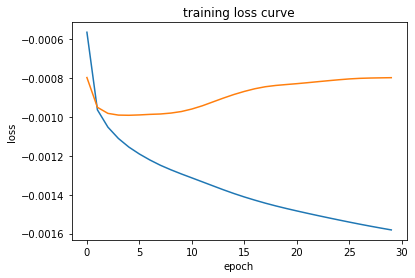

In [95]:
# act = 'tanh'

# 损失函数考虑修改：加mse正则项
def return_loss(y_true, y_pred):
    # pos = K.sign(y_pred)
    loss = -K.mean(y_pred * y_true)
    return loss

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1]))
model.add(Activation('tanh'))
# model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Activation('tanh'))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='tanh'))

opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss=return_loss,optimizer=opt)

rs = model.fit(X_train, y_train,epochs=30,batch_size=128,validation_data=(X_val,y_val),shuffle=False)

plt.close()
plt.plot(rs.history['loss'])
plt.plot(rs.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training loss curve')

In [107]:
model.save('dnn_32_16.h5')

In [96]:
np.sum(model.predict(X_test) * y_test)

0.7907944278077168

In [103]:
y_pred = pd.Series(model.predict(X_test).flatten())

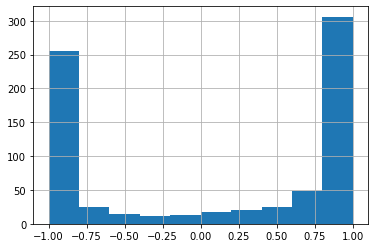

In [106]:
y_pred.hist()

In [100]:
y_true = np.sign(y_train)
y_true[y_true==-1] = 0
y_pred = np.sign(model.predict(X_train))
y_pred[y_pred==-1] = 0
accuracy_score(y_pred,y_true),precision_score(y_true,y_pred),recall_score(y_true,y_pred),f1_score(y_true,y_pred)

(0.5576666666666666,
 0.5349907918968693,
 0.6047883414295628,
 0.5677524429967428)

Train on 6000 samples, validate on 1500 samples
Epoch 1/30
6000/6000 [==============================] - 0s 76us/step - loss: 0.0045 - accuracy: 0.1945 - val_loss: 0.0193 - val_accuracy: 0.1827
Epoch 2/30
6000/6000 [==============================] - 0s 28us/step - loss: 0.1482 - accuracy: 0.1938 - val_loss: 0.1257 - val_accuracy: 0.1960
Epoch 3/30
6000/6000 [==============================] - 0s 27us/step - loss: 0.0578 - accuracy: 0.2052 - val_loss: 0.0601 - val_accuracy: 0.1973
Epoch 4/30
6000/6000 [==============================] - 0s 27us/step - loss: 0.0641 - accuracy: 0.2038 - val_loss: 0.0210 - val_accuracy: 0.1993
Epoch 5/30
6000/6000 [==============================] - 0s 27us/step - loss: -0.0270 - accuracy: 0.2037 - val_loss: -0.0177 - val_accuracy: 0.2067
Epoch 6/30
6000/6000 [==============================] - 0s 25us/step - loss: -0.1205 - accuracy: 0.2017 - val_loss: -0.0048 - val_accuracy: 0.1993
Epoch 7/30
6000/6000 [==============================] - 0s 26us/step - loss: -

Text(0.5, 1.0, 'training loss curve')

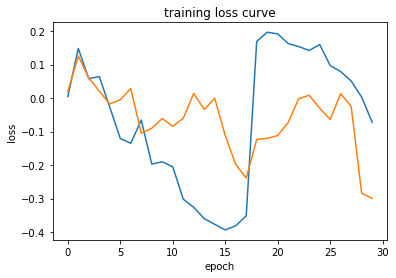

In [82]:
# act = 'tanh'
def return_loss(y_true, y_pred):
    # pos = K.sign(y_pred)
    loss = -K.mean(y_pred * y_true)
    return loss

model = Sequential()
model.add(Dense(32, input_dim=X_train.shape[1]))
model.add(Activation('tanh'))
# model.add(Dropout(0.2))
model.add(Dense(16))
model.add(Activation('tanh'))
# model.add(Dropout(0.2))
model.add(Dense(1,activation='tanh'))

opt = keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss='binary_crossentropy',optimizer=opt,metrics=['accuracy'])

rs = model.fit(X_train, np.sign(y_train),epochs=30,batch_size=128,validation_data=(X_val,np.sign(y_val)),shuffle=False)

plt.close()
plt.plot(rs.history['loss'])
plt.plot(rs.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('training loss curve')

In [73]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [37]:
y_pred = model.predict_classes(X_test).flatten()
y_true = y_test

In [38]:
accuracy_score(y_true,y_pred),precision_score(y_true,y_pred),recall_score(y_true,y_pred),f1_score(y_true,y_pred)

0.5205298013245033

In [42]:
import shap

# load your data here, e.g. X and y
# create and fit your model here

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.DeepExplainer(model,X_train)

In [43]:
shap_values = explainer.shap_values(X_val)

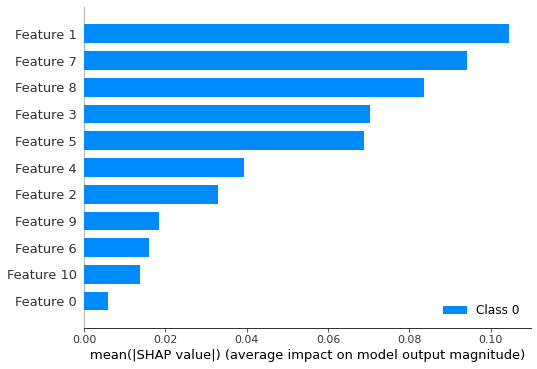

In [44]:
fig = shap.summary_plot(shap_values, X_val, plot_type="bar")

## Baseline models